In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
data = df1.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
print(scaled_features[:5])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [25]:
import math
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42,
}
sse = []
for k in range(1, int(math.sqrt(200)) ):
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km.fit(scaled_features)
    sse.append(km.inertia_)

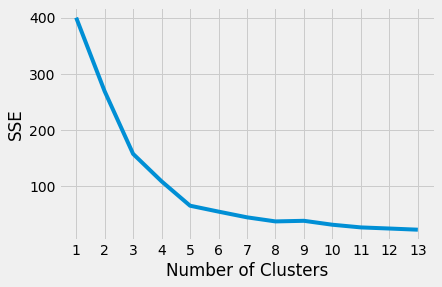

In [29]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, len(sse)+1), sse)
plt.xticks(range(1, len(sse)+1))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
# !pip install kneed
from kneed import KneeLocator

In [32]:
kl = KneeLocator(range(1, len(sse)+1), sse, curve="convex", direction="decreasing")
kl.elbow

5

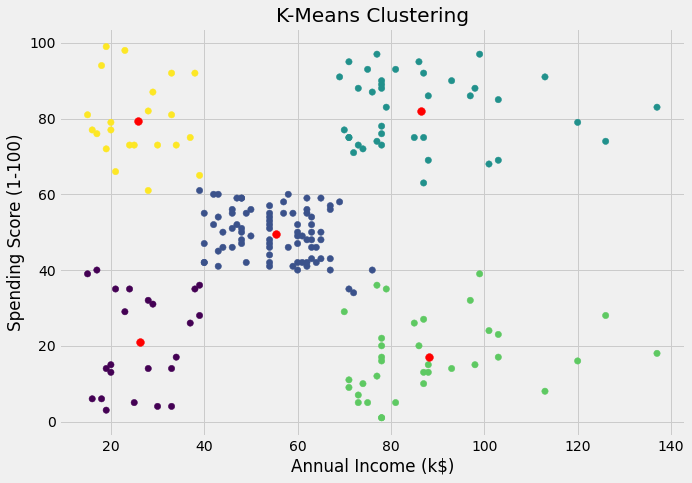

In [79]:
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
km = KMeans(n_clusters=5)
km.fit(data)
labels = km.labels_

plt.figure(figsize=(10, 7))  
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'], c=labels,s=40)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c = 'red', s=60)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

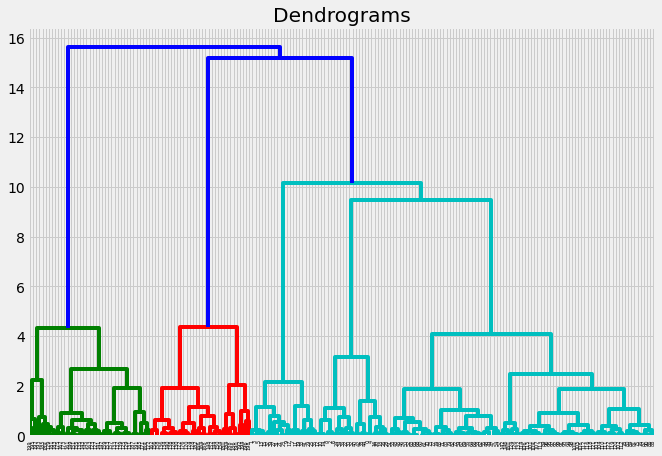

In [78]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_features,method='ward'))

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Text(0, 0.5, 'Spending Score (1-100)')

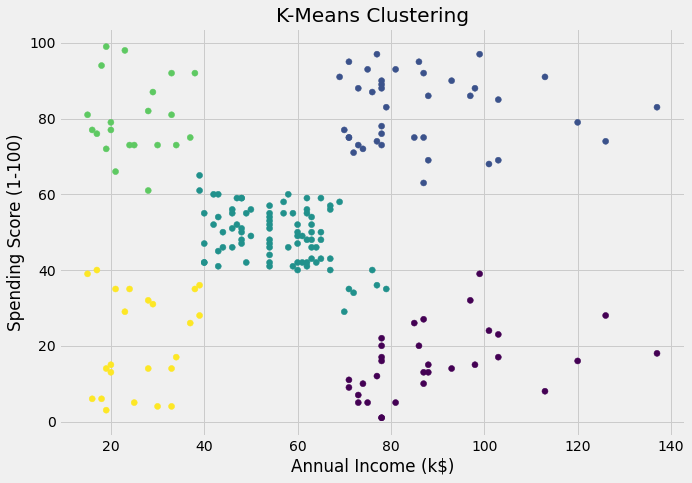

In [77]:
plt.figure(figsize=(10, 7))  
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'], c=cluster.labels_)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')